In [87]:
!pip install scikit-multilearn


In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report 
from sklearn import tree
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from skmultilearn.problem_transform import BinaryRelevance

#sns.set()

In [89]:
datam=pd.read_csv("/content/drive/My Drive/accute/accu.csv")
datam.head()

,temp,naus,lumb_p,urp,mip,bou,inf,nep
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [0]:
s=datam['temp']
for i in range(0,len(s)):
  st=s[i].split(',')
  st=st[0][0]+st[0][1]
  s[i]=st
datam.temp=s



In [91]:
datam

,temp,naus,lumb_p,urp,mip,bou,inf,nep
0,35,no,yes,no,no,no,no,no
1,35,no,no,yes,yes,yes,yes,no
2,35,no,yes,no,no,no,no,no
3,36,no,no,yes,yes,yes,yes,no
4,36,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41,no,yes,yes,no,yes,no,yes
116,41,no,no,no,no,no,no,no
117,41,yes,yes,no,yes,no,no,yes
118,41,no,yes,yes,no,yes,no,yes


In [92]:
for cols in datam:
  datam[cols]=datam[cols].replace({"yes":1,"no":0})
datam

,temp,naus,lumb_p,urp,mip,bou,inf,nep
0,35,0,1,0,0,0,0,0
1,35,0,0,1,1,1,1,0
2,35,0,1,0,0,0,0,0
3,36,0,0,1,1,1,1,0
4,36,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41,0,1,1,0,1,0,1
116,41,0,0,0,0,0,0,0
117,41,1,1,0,1,0,0,1
118,41,0,1,1,0,1,0,1


In [0]:
def conq(x):
  if x != x :
    pass
  else:
    return float(x)
datam=datam.applymap(lambda x:conq(x))


In [94]:
#plotting correlation graph
plt.figure(figsize=(10,10))
corre=datam.corr()
corre=corre.abs()
#ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)
data_sam=datam

<Figure size 720x720 with 0 Axes>

In [95]:
data_sam["inf"].value_counts()


0.0    61
1.0    59
Name: inf, dtype: int64

In [96]:
data_sam["nep"].value_counts()

0.0    70
1.0    50
Name: nep, dtype: int64

In [97]:
x=data_sam.iloc[:,0:6]
y=data_sam.iloc[:,[6,7]]
x,y

(     temp  naus  lumb_p  urp  mip  bou
 0    35.0   0.0     1.0  0.0  0.0  0.0
 1    35.0   0.0     0.0  1.0  1.0  1.0
 2    35.0   0.0     1.0  0.0  0.0  0.0
 3    36.0   0.0     0.0  1.0  1.0  1.0
 4    36.0   0.0     1.0  0.0  0.0  0.0
 ..    ...   ...     ...  ...  ...  ...
 115  41.0   0.0     1.0  1.0  0.0  1.0
 116  41.0   0.0     0.0  0.0  0.0  0.0
 117  41.0   1.0     1.0  0.0  1.0  0.0
 118  41.0   0.0     1.0  1.0  0.0  1.0
 119  41.0   0.0     1.0  1.0  0.0  1.0
 
 [120 rows x 6 columns],      inf  nep
 0    0.0  0.0
 1    1.0  0.0
 2    0.0  0.0
 3    1.0  0.0
 4    0.0  0.0
 ..   ...  ...
 115  0.0  1.0
 116  0.0  0.0
 117  0.0  1.0
 118  0.0  1.0
 119  0.0  1.0
 
 [120 rows x 2 columns])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
# x is the train data and y is the predicted value and test size is 30% 
#remaining 70 for training

Predicted values:
[[1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]     index  inf  nep
0      44  1.0  0.0
1      47  1.0  0.0
2       4  0.0  0.0
3      55  1.0  0.0
4      26  1.0  0.0
5      64  0.0  1.0
6      73  0.0  0.0
7      10  1.0  0.0
8      40  0.0  0.0
9     107  0.0  0.0
10     18  1.0  0.0
11     62  0.0  1.0
12     11  0.0  0.0
13     36  1.0  0.0
14     89  1.0  1.0
15     91  0.0  1.0
16    109  0.0  1.0
17      0  0.0  0.0
18     88  1.0  1.0
19    104  0.0  1.0
20     65  0.0  1.0
21     45  1.0  0.0
22     31  1.0  0.0
23     70  1.0  1.0
24     42  1.0  0.0
25     12  0.0  0.0
26     15  0.0  0.0
27    114  1.0  1.0
28     76  0.0  1.0
29     97  0.0  1.0
30     24  1.0  0.0
31     78  1.0  1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(148.8, 190.26, 'X[0] <= 37.5\ngini = 0.493\nsamples = 84\nvalue = [[43, 41]\n[49, 35]]'),
 Text(74.4, 135.9, 'X[2] <= 0.5\ngini = 0.217\nsamples = 41\nvalue = [[13, 28]\n[41, 0]]'),
 Text(37.2, 81.53999999999999, 'gini = 0.0\nsamples = 28\nvalue = [[0, 28]\n[28, 0]]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 13\nvalue = [[13, 0]\n[13, 0]]'),
 Text(223.20000000000002, 135.9, 'X[2] <= 0.5\ngini = 0.362\nsamples = 43\nvalue = [[30, 13]\n[8, 35]]'),
 Text(186.0, 81.53999999999999, 'gini = 0.0\nsamples = 8\nvalue = [[8, 0]\n[8, 0]]'),
 Text(260.40000000000003, 81.53999999999999, 'X[4] <= 0.5\ngini = 0.233\nsamples = 35\nvalue = [[22, 13]\n[0, 35]]'),
 Text(223.20000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 14\nvalue = [[14, 0]\n[0, 14]]'),
 Text(297.6, 27.180000000000007, 'gini = 0.236\nsamples = 21\nvalue = [[8, 13]\n[0, 21]]')]

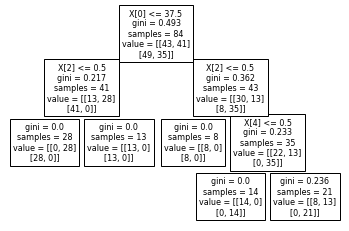

In [99]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100, min_samples_leaf=1,max_depth=3) 
# Performing training 
model=clf_gini.fit(X_train, y_train) 
model
y_pred = clf_gini.predict(X_test) 
print("Predicted values:") 
print(y_pred,y_test.reset_index())
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))
print("Accuracy = ",accuracy_score(y_test,y_pred))

tree.plot_tree(model)


[[1. 0.]
 [1. 0.]
 [0. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]     index  inf  nep
0      44  1.0  0.0
1      47  1.0  0.0
2       4  0.0  0.0
3      55  1.0  0.0
4      26  1.0  0.0
5      64  0.0  1.0
6      73  0.0  0.0
7      10  1.0  0.0
8      40  0.0  0.0
9     107  0.0  0.0
10     18  1.0  0.0
11     62  0.0  1.0
12     11  0.0  0.0
13     36  1.0  0.0
14     89  1.0  1.0
15     91  0.0  1.0
16    109  0.0  1.0
17      0  0.0  0.0
18     88  1.0  1.0
19    104  0.0  1.0
20     65  0.0  1.0
21     45  1.0  0.0
22     31  1.0  0.0
23     70  1.0  1.0
24     42  1.0  0.0
25     12  0.0  0.0
26     15  0.0  0.0
27    114  1.0  1.0
28     76  0.0  1.0
29     97  0.0  1.0
30     24  1.0  0.0
31     78  1.0  1.0
32     22  0.0 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(133.92000000000002, 195.696, 'X[0] <= 37.5\nentropy = 0.99\nsamples = 84\nvalue = [[43, 41]\n[49, 35]]'),
 Text(66.96000000000001, 152.208, 'X[3] <= 0.5\nentropy = 0.451\nsamples = 41\nvalue = [[13, 28]\n[41, 0]]'),
 Text(33.480000000000004, 108.72, 'entropy = 0.0\nsamples = 13\nvalue = [[13, 0]\n[13, 0]]'),
 Text(100.44000000000001, 108.72, 'entropy = 0.0\nsamples = 28\nvalue = [[0, 28]\n[28, 0]]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 0.5\nentropy = 0.789\nsamples = 43\nvalue = [[30, 13]\n[8, 35]]'),
 Text(167.40000000000003, 108.72, 'entropy = 0.0\nsamples = 8\nvalue = [[8, 0]\n[8, 0]]'),
 Text(234.36, 108.72, 'X[4] <= 0.5\nentropy = 0.476\nsamples = 35\nvalue = [[22, 13]\n[0, 35]]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.0\nsamples = 14\nvalue = [[14, 0]\n[0, 14]]'),
 Text(267.84000000000003, 65.232, 'X[3] <= 0.5\nentropy = 0.479\nsamples = 21\nvalue = [[8, 13]\n[0, 21]]'),
 Text(234.36, 21.744, 'entropy = 0.0\nsamples = 8\nvalue = [[8, 0]\n[0, 8]]'),
 Text(30

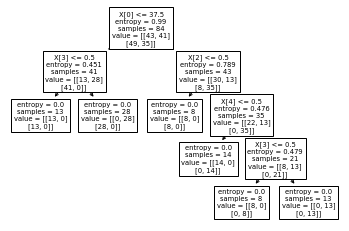

In [100]:
clf_gini = DecisionTreeClassifier(criterion = "entropy",random_state = 50,min_samples_leaf=1,max_depth=5) 
# Performing training 
model=clf_gini.fit(X_train, y_train) 
y_pred = clf_gini.predict(X_test) 
print(y_pred,y_test.reset_index())
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))
#print("acc=",accuracy_score(data_sam_impure_bp['bp'],y_pred)*100)
print("Accuracy = ",accuracy_score(y_test,y_pred))

from sklearn import tree
tree.plot_tree(model)


In [101]:
#doing randdom forest
clf = RandomForestClassifier(max_depth=5, random_state=42)
model=clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))



Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33
 samples avg       0.75      0.75      0.75        33



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
#doing XGBoost Classifier


# META CODE
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))

# You may need to use MultiLabelBinarizer to encode your variables from arrays [[x, y, z]] to a multilabel 
# format before training.
mlb = MultiLabelBinarizer()

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,y_pred))

print(classification_report(y_test,y_pred))

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33
 samples avg       0.75      0.75      0.75        33



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
#doing gausssian (BinaryRelevance)
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,predictions))

print(classification_report(y_test,predictions))

Accuracy =  0.8055555555555556
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        18
           1       1.00      0.80      0.89        15

   micro avg       0.81      0.91      0.86        33
   macro avg       0.86      0.90      0.86        33
weighted avg       0.85      0.91      0.86        33
 samples avg       0.61      0.67      0.63        33



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
# using Label Powerset (GaussianNB)
from skmultilearn.problem_transform import LabelPowerset
from sklearn.naive_bayes import GaussianNB

# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
classifier = LabelPowerset(GaussianNB())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)
print("Accuracy = ",accuracy_score(y_test,predictions))

print(classification_report(y_test,predictions))

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33
 samples avg       0.75      0.75      0.75        33



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [105]:
#knn with multi label
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

x_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(X_test).toarray()
classifier = MLkNN(k=20)

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)
print("Accuracy = ",accuracy_score(y_test,predictions))

print(classification_report(y_test,predictions))

Accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        15

   micro avg       1.00      1.00      1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33
 samples avg       0.75      0.75      0.75        33



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
